In [4]:
# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex 
import warnings
warnings.simplefilter('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Datasets.txt to Datasets.txt


In [7]:
# Loading Dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['Datasets.txt']),on_bad_lines='skip')

In [8]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.38,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6114 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
#Taking the features having object dtype & numeric dtype into col_OBJ and col_NUM
col_OBJ = df.select_dtypes(include = ['object']).columns.to_list()
print('Columns having object dtype:', col_OBJ)
print(100*'-')
col_NUM = df.select_dtypes(exclude = ['object']).columns.to_list()
print('Columns having object dtype:', col_NUM)

Columns having object dtype: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
----------------------------------------------------------------------------------------------------
Columns having object dtype: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8522.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.458933
std,4.643456,0.051598,62.275067,8.371760,1706.527556
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.913200
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Checking the features having missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2409
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               1
dtype: int64

In [14]:
# Treating the Outlet_Size column
df['Outlet_Size'].unique()

array(['Medium', 'Tier 3', 'High', nan, 'Small'], dtype=object)

In [15]:
x = df['Outlet_Size'].mode()

In [16]:
df['Outlet_Size'].fillna(x[0],inplace = True)

In [17]:
# Treating Item_Weight column
df['Item_Weight'].median()

12.6

In [18]:
df['Item_Weight'].mean()

12.857645184135976

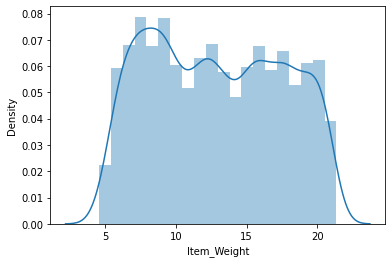

In [19]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Weight'])
plt.show()

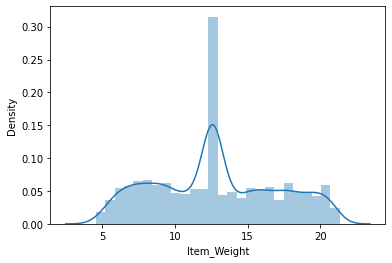

In [20]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Weight'].fillna(df['Item_Weight'].median()))
plt.show()

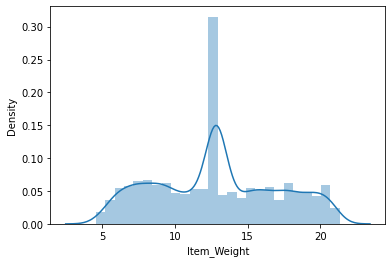

In [21]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Weight'].fillna(df['Item_Weight'].mean()))
plt.show()

In [22]:
# Using the median for filling the missing value
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace = True)


In [23]:
df.dropna(axis = 0,inplace = True)

In [24]:
df.shape

(8522, 12)

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
df['Item_Fat_Content'].replace(to_replace = ['low fat','LF','reg'],value = ['Low Fat','Low Fat','Regular'],inplace = True)

In [28]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Fruits and Vegetables',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
# Plotting and Visualizations

**Checking the co-relation b/w features**

In [31]:
df_corr = df[col_NUM].corr()

In [32]:
df_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013944,0.024837,0.007736,0.009845
Item_Visibility,-0.013944,1.000000,-0.001216,-0.074838,-0.128770
Item_MRP,0.024837,-0.001216,1.000000,0.005018,0.567679
Outlet_Establishment_Year,0.007736,-0.074838,0.005018,1.000000,-0.049135
Item_Outlet_Sales,0.009845,-0.128770,0.567679,-0.049135,1.000000


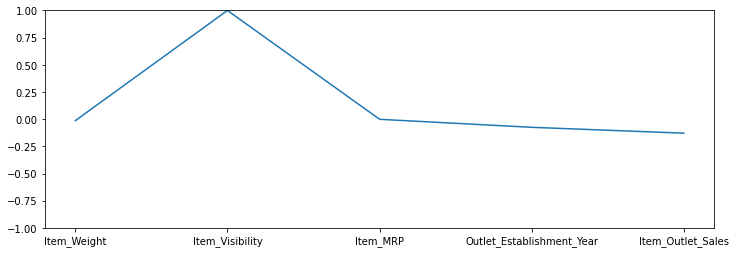

In [33]:
x = df_corr.filter(like = 'Item_Visibility')
plt.figure(figsize = (12,4))
plt.ylim([-1,1])
plt.plot(x)

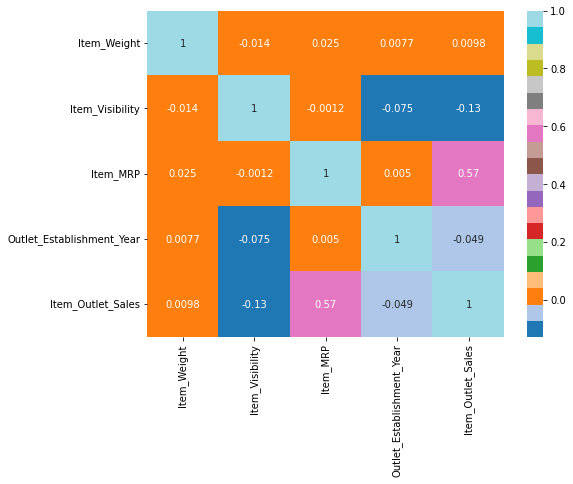

In [34]:
plt.figure(figsize = (8,6))
sns.heatmap(df_corr,annot = True,cmap='tab20')
plt.show()

In [35]:
#skewness in the data
df.skew()

Item_Weight                  0.122014
Item_Visibility              1.167156
Item_MRP                     0.127403
Outlet_Establishment_Year   -0.396610
Item_Outlet_Sales            1.177384
dtype: float64

From the above result, we can check which variable is normally distributed and which is not.

1. The variables with skewness > 1 such as Item_Visibility & Item_Outlet_Sales are highly positively skewed.
2. The variables with skewness < -1 are highly negatively skewed.
3. The variables with 0.5 < skewness < 1 are moderately positively skewed.
4. The variables with -0.5 > skewness > -1 are moderately negatively skewed such as Outlet_Establishment_Year.
5. And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as Item_Weight & Item_MRP.



**Checking the distribution of some variables using Histogram & Distribution plot.**

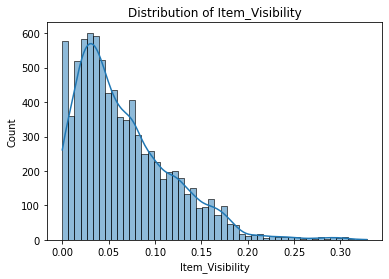

In [36]:
plt.figure(figsize = (6,4))
sns.histplot(df['Item_Visibility'], kde = True)
plt.title('Distribution of Item_Visibility')
plt.show()

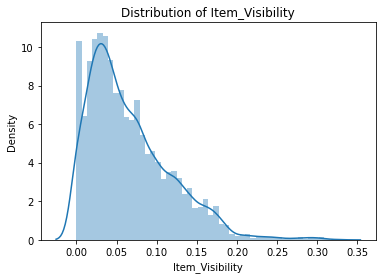

In [37]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Visibility'])
plt.title('Distribution of Item_Visibility')
plt.show()
# Item Visibility data is right-skewed.

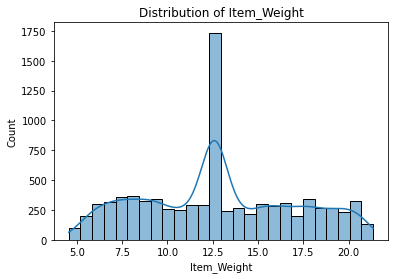

In [38]:
plt.figure(figsize = (6,4))
sns.histplot(df['Item_Weight'], kde = True)
plt.title('Distribution of Item_Weight')
plt.show()

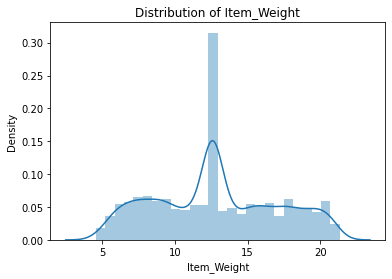

In [39]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.show()

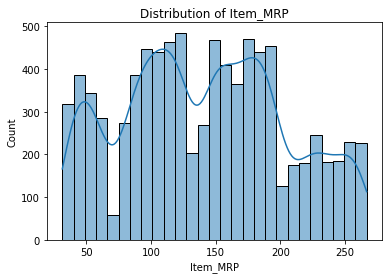

In [40]:
plt.figure(figsize = (6,4))
sns.histplot(df['Item_MRP'], kde = True)
plt.title('Distribution of Item_MRP')
plt.show()

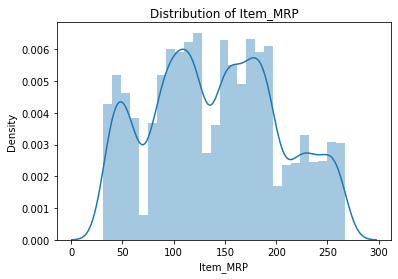

In [41]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_MRP'])
plt.title('Distribution of Item_MRP')
plt.show()

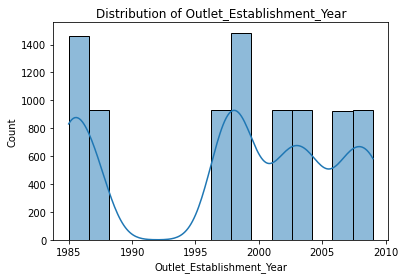

In [42]:
plt.figure(figsize = (6,4))
sns.histplot(df['Outlet_Establishment_Year'], kde = True)
plt.title('Distribution of Outlet_Establishment_Year')
plt.show()

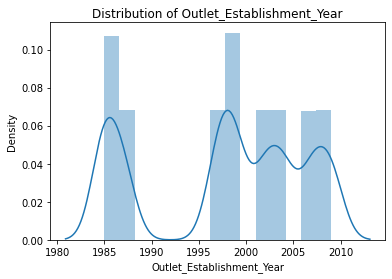

In [43]:
plt.figure(figsize = (6,4))
sns.distplot(df['Outlet_Establishment_Year'])
plt.title('Distribution of Outlet_Establishment_Year')
plt.show()

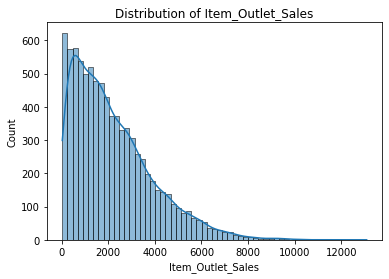

In [44]:
plt.figure(figsize = (6,4))
sns.histplot(df['Item_Outlet_Sales'], kde = True)
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

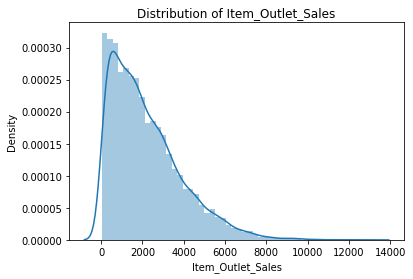

In [45]:
plt.figure(figsize = (6,4))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

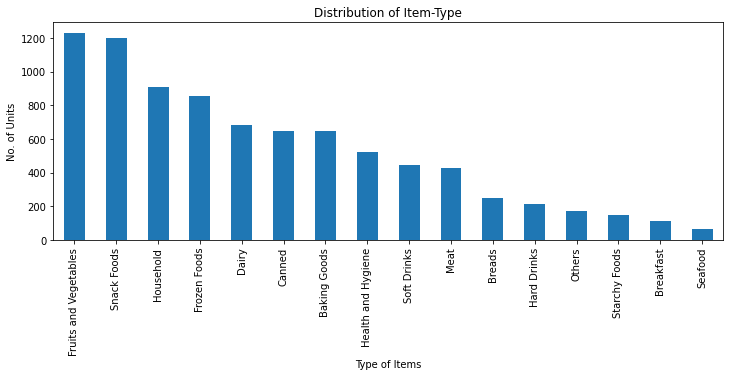

In [46]:
data = df['Item_Type'].value_counts()
plt.figure(figsize = (12,4))
data.plot(kind = 'bar')
plt.title('Distribution of Item-Type')
plt.xlabel('Type of Items',fontsize = 10)
plt.ylabel('No. of Units',fontsize = 10)
plt.show()

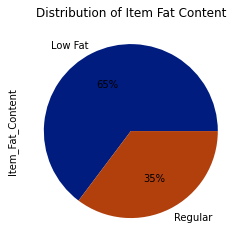

In [47]:
data = df['Item_Fat_Content'].value_counts()
plt.figure(figsize = (12,4))
palette_color = sns.color_palette('dark')
data.plot(kind = 'pie',autopct='%.0f%%',colors=palette_color)
plt.title('Distribution of Item Fat Content')
plt.show()

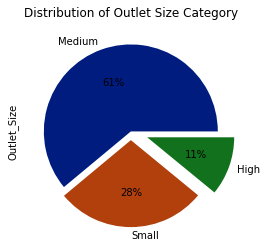

In [48]:
data = df['Outlet_Size'].value_counts()
plt.figure(figsize = (12,4))
palette_color = sns.color_palette('dark')
data.plot(kind = 'pie',autopct='%.0f%%',colors=palette_color,explode=[0.0,0.1,0.2])
plt.title('Distribution of Outlet Size Category')
plt.show()

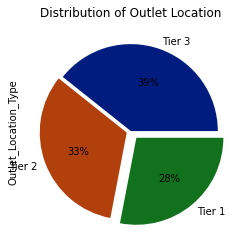

In [49]:
data = df['Outlet_Location_Type'].value_counts()
plt.figure(figsize = (12,4))
palette_color = sns.color_palette('dark')
data.plot(kind = 'pie',autopct='%.0f%%',colors=palette_color,explode=[0.0,0.05,0.1])
plt.title('Distribution of Outlet Location')
plt.show()

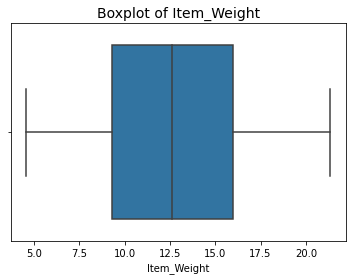

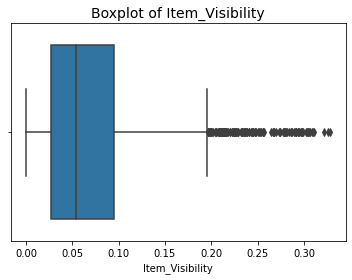

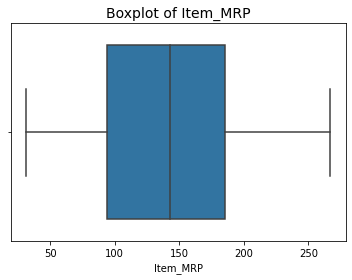

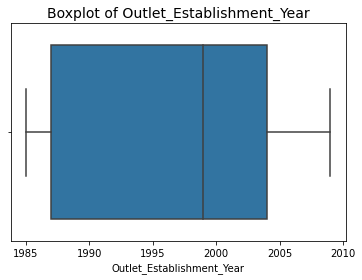

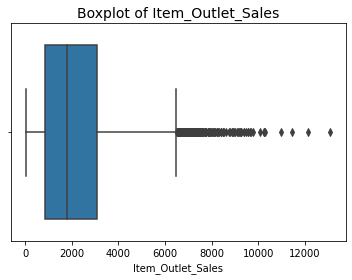

In [51]:
for i in col_NUM:
  sns.boxplot(df[i], orient = 'h')
  plt.title('Boxplot of {}'.format(i),fontsize = 14)
  plt.show()

**Plotting scatter plot between Item Visibility & other numeric features**

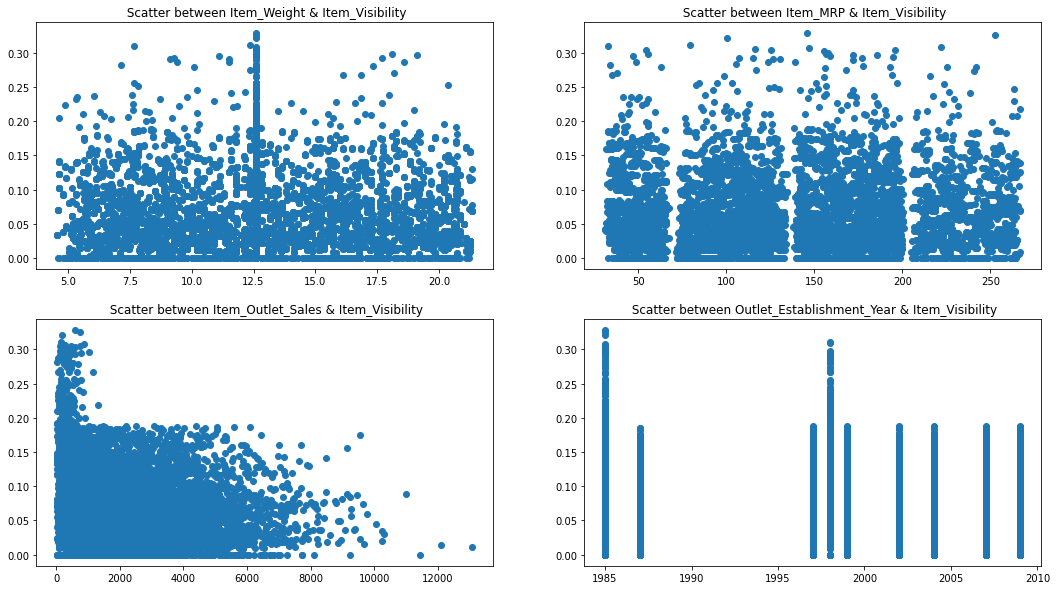

In [52]:
fig,ax = plt.subplots(2,2,figsize = (18,10))
ax[0,0].scatter(x = df['Item_Weight'], y = df['Item_Visibility'])
ax[0,0].set_title(' Scatter between Item_Weight & Item_Visibility')

ax[0,1].scatter(x = df['Item_MRP'], y = df['Item_Visibility'])
ax[0,1].set_title(' Scatter between Item_MRP & Item_Visibility')

ax[1,0].scatter(x = df['Item_Outlet_Sales'], y = df['Item_Visibility'])
ax[1,0].set_title(' Scatter between Item_Outlet_Sales & Item_Visibility')

ax[1,1].scatter(x = df['Outlet_Establishment_Year'], y = df['Item_Visibility'])
ax[1,1].set_title(' Scatter between Outlet_Establishment_Year & Item_Visibility')

plt.show()

# Bonus : **Suppose if you want to plot boxplot, histplot & distplot side by side for all the numerical features.** 

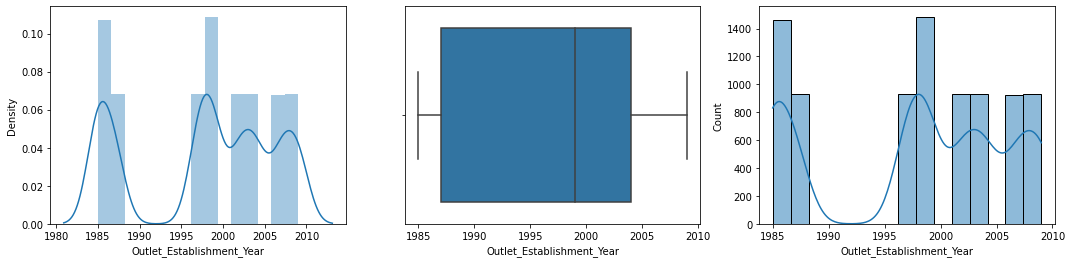

In [53]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.distplot(df['Outlet_Establishment_Year'])
plt.subplot(1,3,2)
sns.boxplot(df['Outlet_Establishment_Year'])
plt.subplot(1,3,3)
sns.histplot(df['Outlet_Establishment_Year'],kde = True)

plt.show()


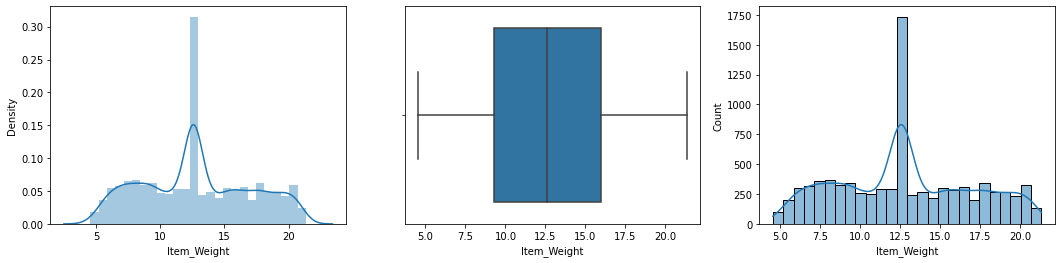

In [54]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.distplot(df['Item_Weight'])
plt.subplot(1,3,2)
sns.boxplot(df['Item_Weight'])
plt.subplot(1,3,3)
sns.histplot(df['Item_Weight'],kde = True)

plt.show()

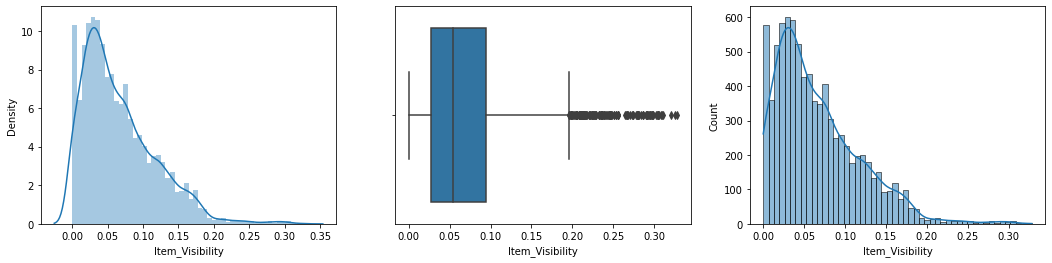

In [55]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.distplot(df['Item_Visibility'])
plt.subplot(1,3,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(1,3,3)
sns.histplot(df['Item_Visibility'],kde = True)

plt.show()

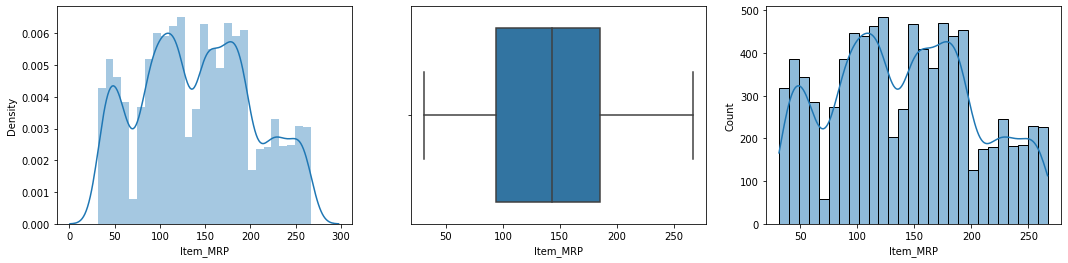

In [56]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.distplot(df['Item_MRP'])
plt.subplot(1,3,2)
sns.boxplot(df['Item_MRP'])
plt.subplot(1,3,3)
sns.histplot(df['Item_MRP'],kde = True)

plt.show()

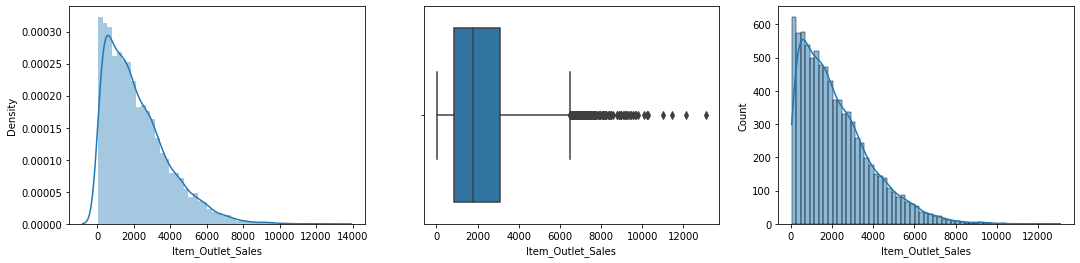

In [57]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.distplot(df['Item_Outlet_Sales'])
plt.subplot(1,3,2)
sns.boxplot(df['Item_Outlet_Sales'])
plt.subplot(1,3,3)
sns.histplot(df['Item_Outlet_Sales'],kde = True)

plt.show()